In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Programming\AI\Jadi\Practice\Non_Linear_Regression\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['smoker'] = df['smoker'].str.strip().str.lower()
df.replace({'female':1, 'male':0}, inplace=True)
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': -1})
df['region'] = df['region'].replace({'southeast': 0, 'northeast': 1, 'southwest' : 2, 'northwest' : 3})
df.head()

C:\Users\Amin\AppData\Local\Temp\ipykernel_10948\2229172322.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'female':1, 'male':0}, inplace=True)
C:\Users\Amin\AppData\Local\Temp\ipykernel_10948\2229172322.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes': 1, 'no': -1})
C:\Users\Amin\AppData\Local\Temp\ipykernel_10948\2229172322.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explici

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,-1,0,1725.55230
2,28,0,33.000,3,-1,0,4449.46200
3,33,0,22.705,0,-1,3,21984.47061
4,32,0,28.880,0,-1,3,3866.85520


In [4]:
age = np.asanyarray(df['age'])
sex = np.asanyarray(df['sex'])
bmi = np.asanyarray(df['bmi'])
children = np.asanyarray(df['children'])
smoker = np.asanyarray(df['smoker'])
region = np.asanyarray(df['region'])
charges = np.asanyarray(df['charges'])

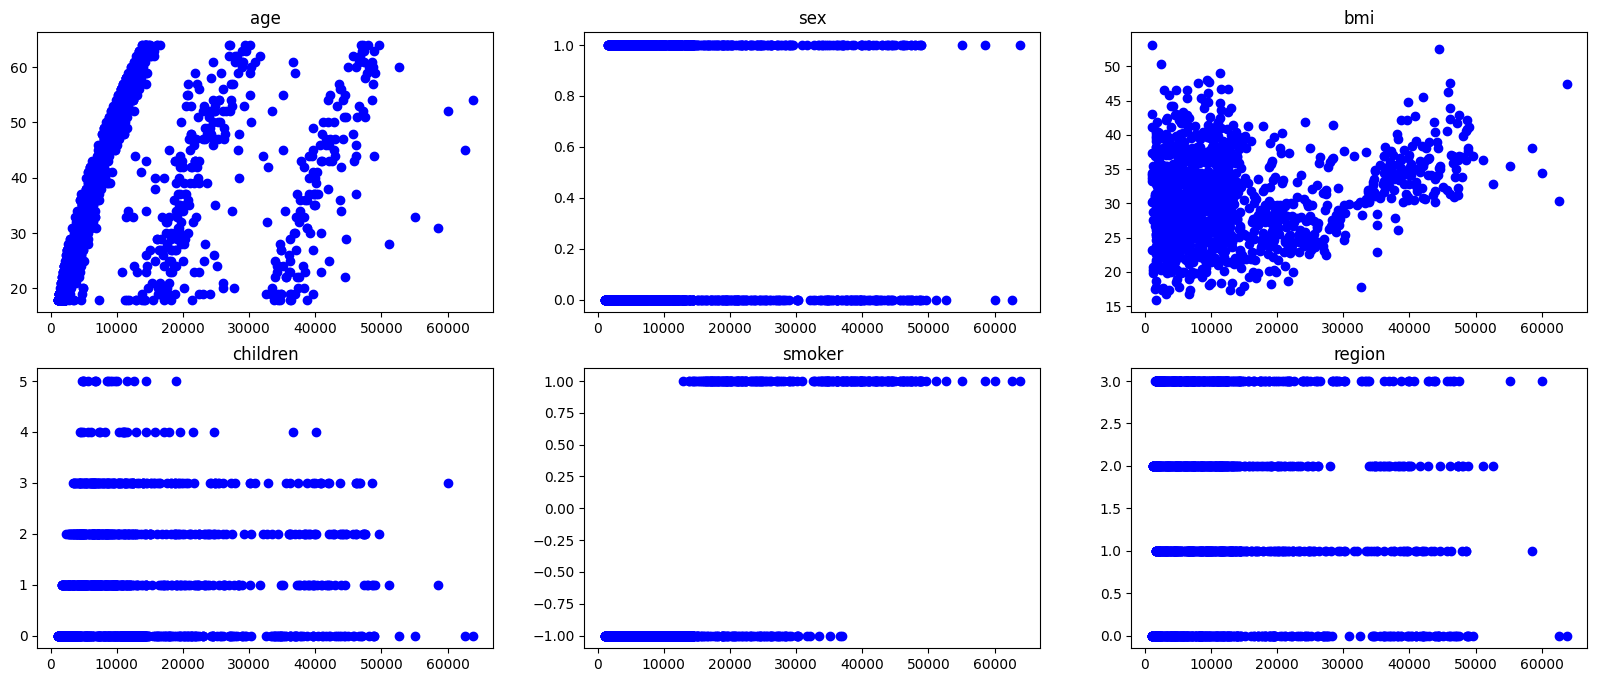

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

axes[0, 0].scatter(charges, age, color = 'blue')
axes[0, 0].set_title('age')

axes[0, 1].scatter(charges, sex, color = 'blue')
axes[0, 1].set_title('sex')

axes[0, 2].scatter(charges, bmi, color = 'blue')
axes[0, 2].set_title('bmi')

axes[1, 0].scatter(charges, children, color = 'blue')
axes[1, 0].set_title('children')

axes[1, 1].scatter(charges, smoker, color = 'blue')
axes[1, 1].set_title('smoker')

axes[1, 2].scatter(charges, region, color = 'blue')
axes[1, 2].set_title('region')

plt.show()

In [6]:
msk = np.random.rand(len(age)) < 0.8
x1 = age[msk]
x1_t = age[~msk]
x2 = smoker[msk]
x2_t = smoker[~msk]
y = charges[msk]
y_t = charges[~msk]

In [7]:
def sigmoid(X, b1, b2, b3, b4, i):
    x1, x2 = X
    y = i + b1*(x1) + b2*(x1*x1) + b3*(x1*x1*x1) + b4*(x2)
    return y

In [8]:
x1 = x1/max(x1)
x1_t = x1_t/max(x1_t)
x2 = x2/max(x2)
x2_t = x2_t/max(x2_t)
y = y/max(y)
y_t = y_t/max(y_t)
X = np.vstack((x1, x2))
X_t = np.vstack((x1_t, x2_t))

In [9]:
from scipy.optimize import curve_fit

initial_guess = [1, 1, 1, 1, 1]
popt, pcov = curve_fit(sigmoid, X, y, p0=initial_guess)

print(popt)

[-0.0787494   0.42504179 -0.1322351   0.18985356  0.23212888]


In [10]:
y_pred = sigmoid(X, popt[0], popt[1], popt[2], popt[3], popt[4])
y_pred_t = sigmoid(X_t, popt[0], popt[1], popt[2], popt[3], popt[4])

In [11]:
charges = charges/max(charges)
age = age/max(age)

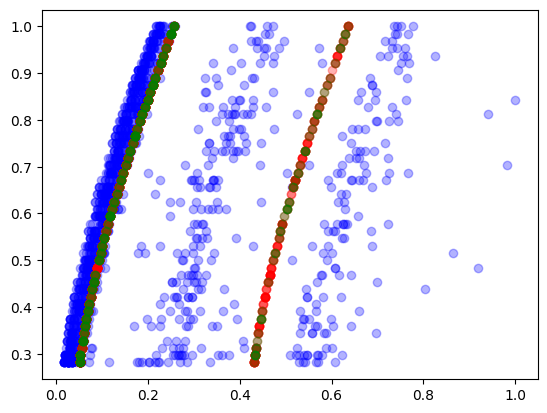

In [13]:
plt.scatter(charges, age, color='blue', alpha=0.3)
plt.scatter(y_pred, X[0], color='red', alpha=0.3)
plt.scatter(y_pred_t, X_t[0], color='green', alpha=0.3)
plt.show()

In [14]:
from sklearn.metrics import r2_score

score = r2_score(y_t, y_pred_t)
print(score)

0.688845521818962
